In [110]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable


In [70]:
def visualize(mesh):
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(mesh)
    vis.run()
    vis.destroy_window()

In [71]:
def get_surface_alpha_shape(_mesh, alpha=0.03, size=750):
    
    pcd = _mesh.sample_points_poisson_disk(size)
    pcd_hat = _mesh.sample_points_uniformly(number_of_points=size)
    #mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha)
    #mesh.compute_vertex_normals()
    
    return np.asarray(pcd.points),  np.asarray(pcd_hat.points)
    

In [72]:
def get_surface_normal_estimation(_mesh, size=5000):
    
    pcd = _mesh.sample_points_poisson_disk(size)
    pcd.normals = o3d.utility.Vector3dVector(np.zeros((1, 3)))
    pcd.estimate_normals()
    return np.asarray(pcd.points), np.asarray(pcd.normals)

In [73]:
chair = o3d.io.read_triangle_mesh("data/Wooden chair.obj")
S_chair_alpha, S_hat_chair_alpha = get_surface_alpha_shape(chair, size=5000)
S_chair_normal, S_hat_chair_normal = get_surface_normal_estimation(chair, size=50000)

In [74]:
#dragon = o3d.io.read_triangle_mesh("data/Fantasy Dragon.obj")
#S_dragon = get_surface_alpha_shape(dragon)

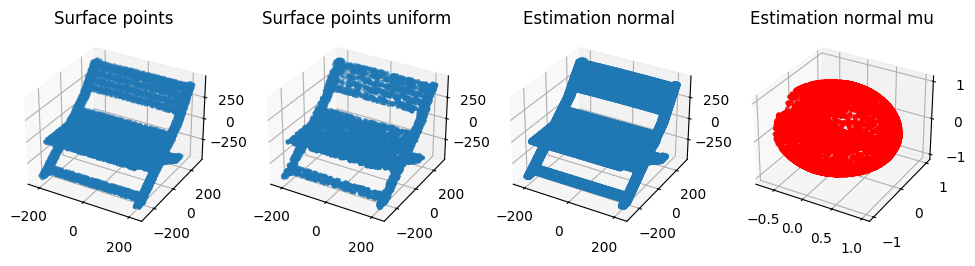

In [75]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(141, projection='3d')
ax.scatter(S_chair_alpha[:, 0], S_chair_alpha[:, 1], S_chair_alpha[:, 2], marker='.');
ax.set_title("Surface points");
ax = fig.add_subplot(142, projection='3d')
ax.scatter(S_hat_chair_alpha[:, 0], S_hat_chair_alpha[:, 1], S_hat_chair_alpha[:, 2], marker='.');
ax.set_title("Surface points uniform");
ax = fig.add_subplot(143, projection='3d')
ax.scatter(S_chair_normal[:, 0], S_chair_normal[:, 1], S_chair_normal[:, 2], marker='.');
ax.set_title("Estimation normal");
ax = fig.add_subplot(144, projection='3d')
ax.scatter(S_hat_chair_normal[:, 0], S_hat_chair_normal[:, 1], S_hat_chair_normal[:, 2], marker='.', color="red");
ax.set_title("Estimation normal mu");

In [76]:
S_chair_normal

array([[  52.89498951,  206.93489599,  324.80811508],
       [ 131.93989907,  211.18289941,  339.88899146],
       [ 176.81326916,  207.23142215,  334.90423311],
       ...,
       [-175.61226241,  -55.24591168, -150.5358679 ],
       [ 176.45468211,  -50.80127287, -152.62319633],
       [ 178.37404849,  -56.19271239, -156.2759814 ]])

In [77]:
S_hat_chair_normal

array([[-0.02558722, -0.96118523,  0.27471486],
       [-0.01151756, -0.84537479,  0.53404944],
       [-0.04598914, -0.92522462,  0.37662237],
       ...,
       [ 0.99704966,  0.07449886,  0.01849017],
       [ 0.99983036, -0.01043389, -0.01517862],
       [ 0.99600525,  0.0798463 ,  0.03997628]])

In [78]:
david = o3d.io.read_triangle_mesh("data/Rally Roadbook Remote Controller 3 buttons v16.obj")
S_david_normal, S_hat_david_normal = get_surface_normal_estimation(david, size=50000)

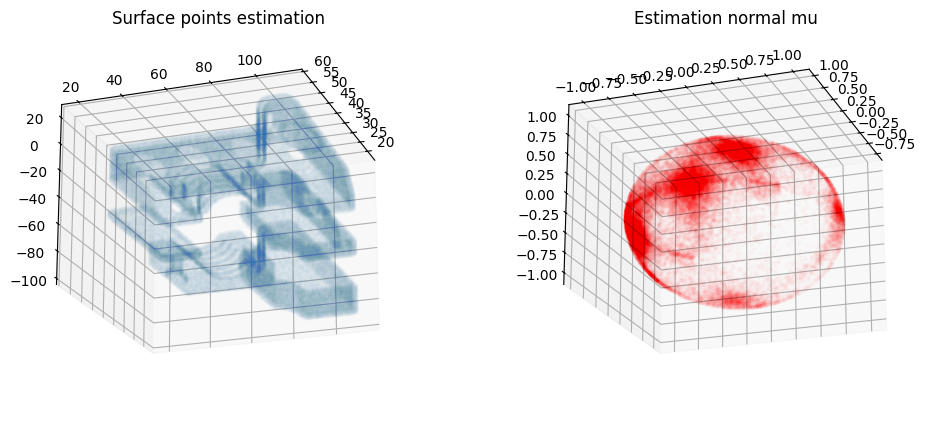

In [79]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(S_david_normal[:, 0], S_david_normal[:, 1], S_david_normal[:, 2], marker='.', alpha=0.01);
ax.view_init(-20, 20, 0)
ax.set_title("Surface points estimation");
ax = fig.add_subplot(122, projection='3d')
ax.scatter(S_hat_david_normal[:, 0], S_hat_david_normal[:, 1], S_hat_david_normal[:, 2], marker='.', color="red", alpha=0.01);
ax.view_init(-20, 20, 0)
ax.set_title("Estimation normal mu");

In [80]:
david_2 = o3d.io.read_triangle_mesh("data/Rally Roadbook Remote Controller v2 v11.obj")
S_david_normal_2, S_hat_david_normal_2 = get_surface_normal_estimation(david_2, size=50000)

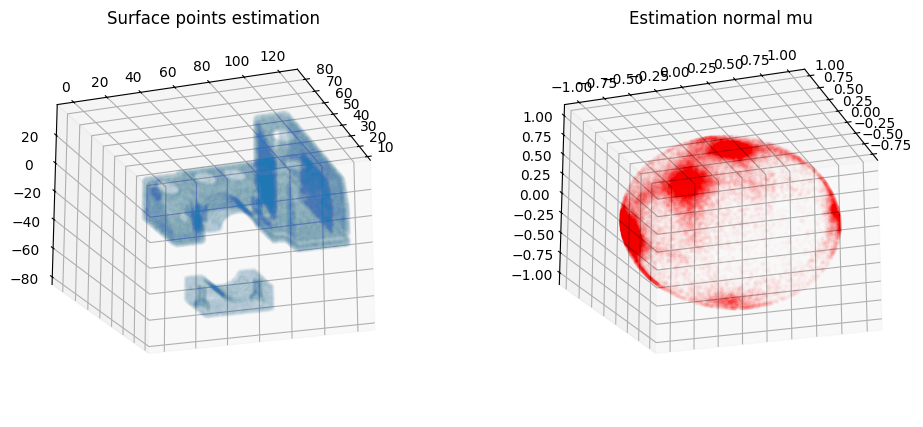

In [81]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(S_david_normal_2[:, 0], S_david_normal_2[:, 1], S_david_normal_2[:, 2], marker='.', alpha=0.01);
ax.view_init(-20, 20, 0)
ax.set_title("Surface points estimation");
ax = fig.add_subplot(122, projection='3d')
ax.scatter(S_hat_david_normal_2[:, 0], S_hat_david_normal_2[:, 1], S_hat_david_normal_2[:, 2], marker='.', color="red", alpha=0.01);
ax.view_init(-20, 20, 0)
ax.set_title("Estimation normal mu");

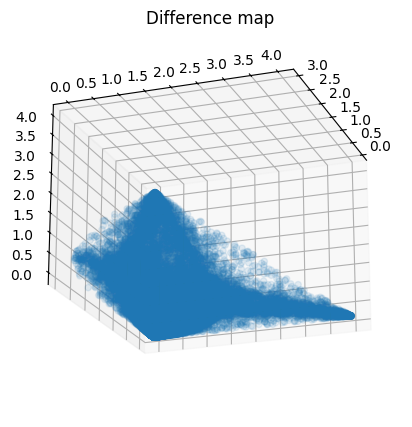

In [82]:
fig = plt.figure(figsize=(12,5))
_X = (S_hat_david_normal_2[:, 0] - S_hat_david_normal[:, 0])**2
_Y = (S_hat_david_normal_2[:, 1] - S_hat_david_normal[:, 1])**2
_Z = (S_hat_david_normal_2[:, 2] - S_hat_david_normal[:, 2])**2
ax = fig.add_subplot(121, projection='3d')
ax.scatter(_X, _Y, _Z, alpha=0.1);
ax.view_init(-20, 20, 0)
plt.title("Difference map");

/Users/eduardodisanti/anaconda3/envs/Open3d/lib/python3.9/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


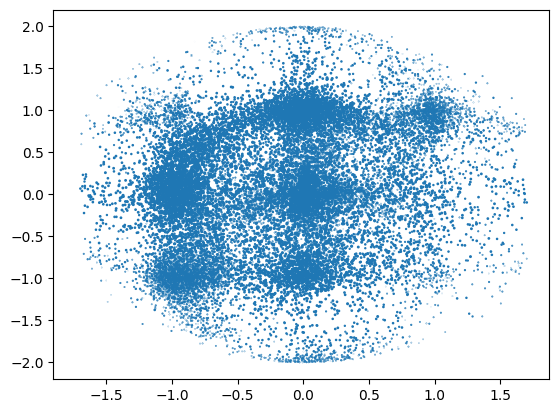

In [83]:
_X = S_hat_david_normal_2[:, 0] - S_hat_david_normal[:, 0]
_Y = S_hat_david_normal_2[:, 1] - S_hat_david_normal[:, 1]
_Z = S_hat_david_normal_2[:, 2] - S_hat_david_normal[:, 2]
plt.scatter(_X, _Y, _Z);

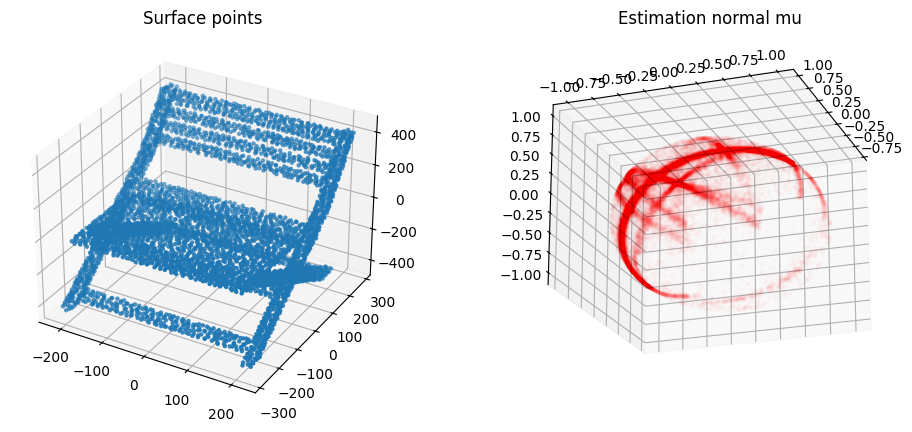

In [84]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(S_chair_alpha[:, 0], S_chair_alpha[:, 1], S_chair_alpha[:, 2], marker='.');
ax.set_title("Surface points");
ax = fig.add_subplot(122, projection='3d')
ax.scatter(S_hat_chair_normal[:, 0], S_hat_chair_normal[:, 1], S_hat_chair_normal[:, 2], marker='.', color="red", alpha=0.01);
ax.view_init(-20, 20, 0)
ax.set_title("Estimation normal mu");
plt.show()

In [85]:
rocket = o3d.io.read_triangle_mesh("data/rocket.obj")
S_rocket_alpha, S_rocket_alpha_normal = get_surface_alpha_shape(rocket, size=1000)
S_rocket_normal, S_hat_rocket_normal = get_surface_normal_estimation(rocket, size=1000)

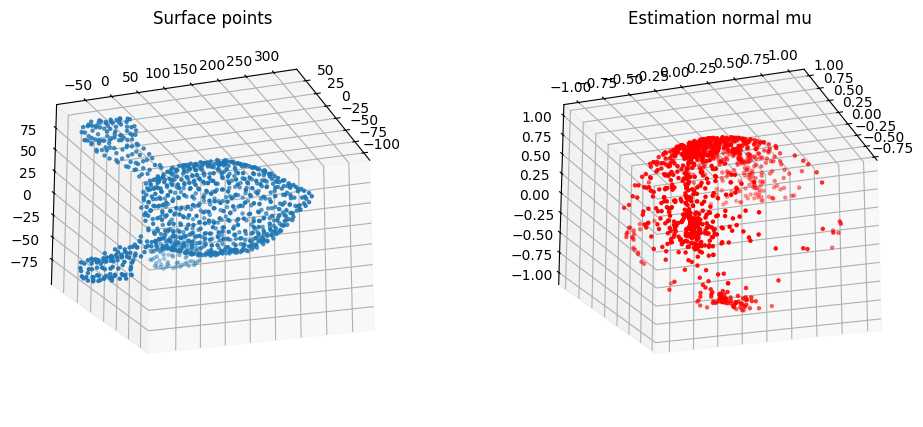

In [86]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(S_rocket_alpha[:, 0], S_rocket_alpha[:, 1], S_rocket_alpha[:, 2], marker='.');
ax.view_init(-20, 20, 0)
ax.set_title("Surface points");
ax = fig.add_subplot(122, projection='3d')
ax.scatter(S_hat_rocket_normal[:, 0], S_hat_rocket_normal[:, 1], S_hat_rocket_normal[:, 2], marker='.', color="red");
ax.view_init(-20, 20, 0)
ax.set_title("Estimation normal mu");
plt.show()

##### VISUALING THE FULL NORMALS #####

In [87]:
"""
pcd = chair.sample_points_poisson_disk(5000)
pcd.normals = o3d.utility.Vector3dVector(np.zeros(
    (1, 3)))  # invalidate existing normals

pcd.estimate_normals()
o3d.visualization.draw_geometries([pcd], point_show_normal=True)
"""

'\npcd = chair.sample_points_poisson_disk(5000)\npcd.normals = o3d.utility.Vector3dVector(np.zeros(\n    (1, 3)))  # invalidate existing normals\n\npcd.estimate_normals()\no3d.visualization.draw_geometries([pcd], point_show_normal=True)\n'

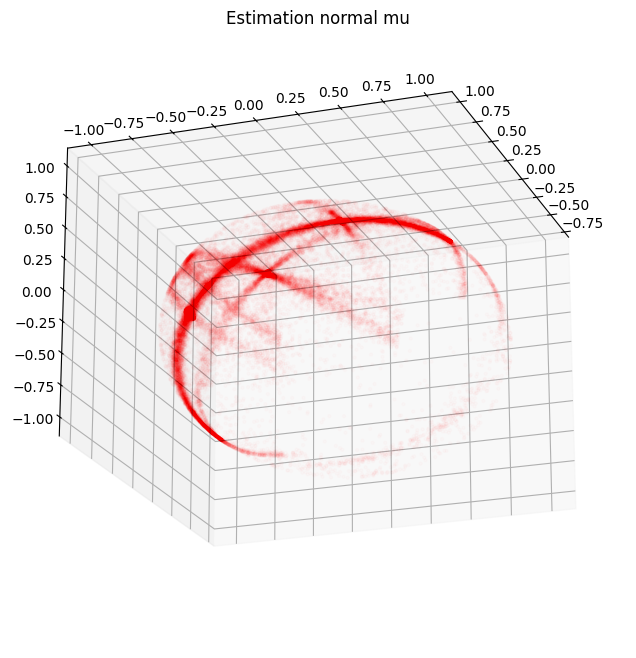

In [88]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(S_hat_chair_normal[:, 0], S_hat_chair_normal[:, 1], S_hat_chair_normal[:, 2], marker='.', color="red", alpha=0.01);
ax.view_init(-20, 20, 0)
ax.set_title("Estimation normal mu");
plt.show()

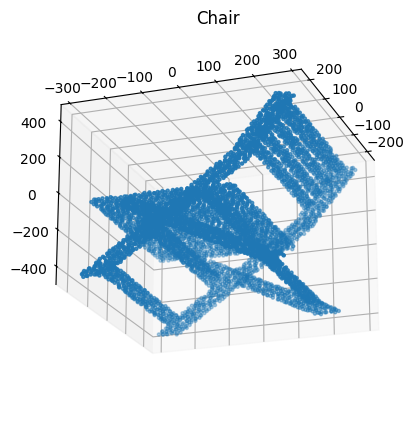

In [89]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(S_chair_alpha[:, 0], S_chair_alpha[:, 1], S_chair_alpha[:, 2], marker='.');
ax.view_init(-20, 20, 0)
ax.set_title("Chair");
plt.show()

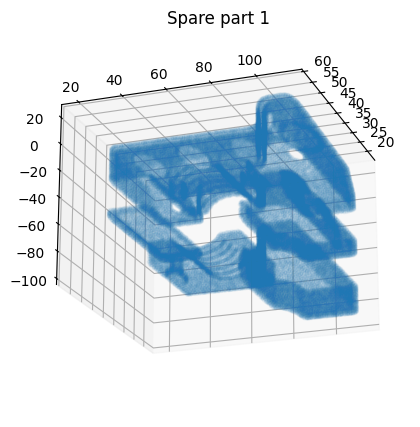

In [90]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(S_david_normal[:, 0], S_david_normal[:, 1], S_david_normal[:, 2], marker='.', alpha=0.05);
ax.view_init(-20, 20, 0)
ax.set_title("Spare part 1");
plt.show()

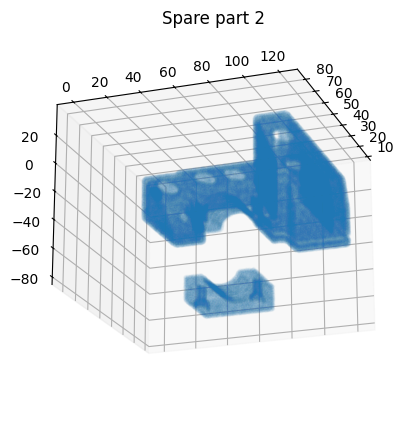

In [91]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(S_david_normal_2[:, 0], S_david_normal_2[:, 1], S_david_normal_2[:, 2], marker='.', alpha=0.03);
ax.view_init(-20, 20, 0)
ax.set_title("Spare part 2");
plt.show()

In [92]:
from importlib.metadata import version
version('scipy')

'1.11.3'

#### USAGE ####

In [93]:
#import open3d as o3d
#import numpy as np
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

chair = o3d.io.read_triangle_mesh("data/Wooden chair.obj")
S_chair_alpha, S_hat_chair_alpha = get_surface_alpha_shape(chair, size=5000)
S_chair_normal, S_hat_chair_normal = get_surface_normal_estimation(chair, size=5000)
normals_2d_chair = S_hat_chair_normal.reshape(-1, 3)


In [94]:
### Estimate multivariate normal distribution parameters for the chair
mean_normal_chair = np.mean(normals_2d_chair, axis=0)
cov_matrix_chair  = np.cov(normals_2d_chair, rowvar=False)
### Create a multivariate normal distribution based on mean and covariance
mvn_chair = multivariate_normal(mean=mean_normal_chair, cov=cov_matrix_chair)
samples_chair = mvn_chair.rvs(size=2000)


In [95]:
piece_1 = o3d.io.read_triangle_mesh("data/Rally Roadbook Remote Controller 3 buttons v16.obj")
S_piece_1_alpha, S_hat_piece_1_alpha = get_surface_alpha_shape(piece_1, size=5000)
S_piece_1_normal, S_hat_piece_1_normal = get_surface_normal_estimation(piece_1, size=5000)
normals_2d_piece_1 = S_hat_piece_1_normal.reshape(-1, 3)

### Estimate multivariate normal distribution parameters for the piece 1
mean_normal_piece_1 = np.mean(normals_2d_piece_1, axis=0)
cov_matrix_piece_1  = np.cov(normals_2d_piece_1, rowvar=False)
mvn_piece_1 = multivariate_normal(mean=mean_normal_piece_1, cov=cov_matrix_chair)
samples_piece_1 = mvn_piece_1.rvs(size=2000)


In [96]:
piece_2 = o3d.io.read_triangle_mesh("data/Rally Roadbook Remote Controller v2 v11.obj")
S_piece_2_alpha, S_hat_piece_2_alpha = get_surface_alpha_shape(piece_2, size=5000)
S_piece_2_normal, S_hat_piece_2_normal = get_surface_normal_estimation(piece_2, size=5000)
normals_2d_piece_2 = S_hat_piece_2_normal.reshape(-1, 3)

### Estimate multivariate normal distribution parameters for the piece 2
mean_normal_piece_2 = np.mean(normals_2d_piece_2, axis=0)
cov_matrix_piece_2  = np.cov(normals_2d_piece_2, rowvar=False)
mvn_piece_2 = multivariate_normal(mean=mean_normal_piece_2, cov=cov_matrix_chair)
samples_piece_2 = mvn_piece_2.rvs(size=2000)

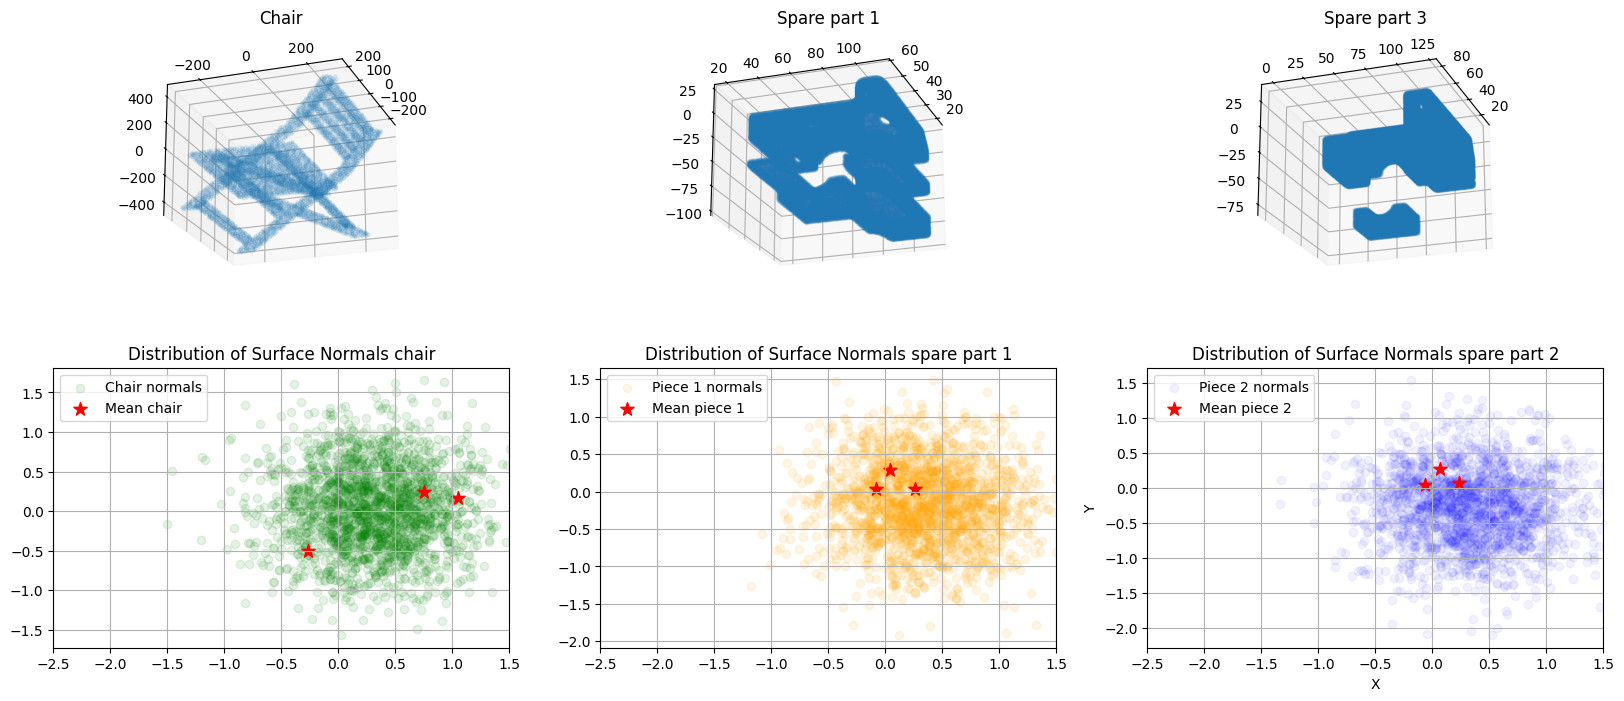

In [97]:
# Visualize the multivariate normal distribution
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(231, projection='3d')
ax.scatter(S_chair_normal[:, 0], S_chair_normal[:, 1], S_chair_normal[:, 2], marker='.', alpha=0.1);
ax.view_init(-20, 20, 0)
ax.set_title('Chair')

ax = fig.add_subplot(232, projection='3d')
ax.scatter(S_david_normal[:, 0], S_david_normal[:, 1], S_david_normal[:, 2], marker='.', alpha=0.1);
ax.view_init(-20, 20, 0)
ax.set_title('Spare part 1')

ax = fig.add_subplot(233, projection='3d')
ax.scatter(S_david_normal_2[:, 0], S_david_normal_2[:, 1], S_david_normal_2[:, 2], marker='.', alpha=0.1);
ax.view_init(-20, 20, 0)
ax.set_title('Spare part 3')

plt.subplot(234)
plt.scatter(samples_chair[:, 0], samples_chair[:, 1], alpha=0.1, c='green', label='Chair normals')
plt.scatter(samples_chair[0], samples_chair[1], c='red',  label='Mean chair', marker='*', s=100)
plt.title('Distribution of Surface Normals chair')
plt.xlim(-1, 2)
plt.xlim(-2.5, 1.5)
plt.grid()
plt.legend()

plt.subplot(235)
plt.scatter(samples_piece_1[:, 0], samples_piece_1[:, 1], c='orange', alpha=0.1, label='Piece 1 normals')
plt.scatter(cov_matrix_piece_1[0], cov_matrix_piece_1[1], c='red',  label='Mean piece 1', marker='*', s=100)
plt.title('Distribution of Surface Normals spare part 1')
plt.xlim(-1, 2)
plt.xlim(-2.5, 1.5)
plt.grid()
plt.legend()

plt.subplot(236)
plt.scatter(samples_piece_2[:, 0], samples_piece_2[:, 1], c='blue', alpha=0.05, label='Piece 2 normals')
plt.scatter(cov_matrix_piece_2[0], cov_matrix_piece_2[1], c='red',  label='Mean piece 2', marker='*', s=100)
plt.title('Distribution of Surface Normals spare part 2')
plt.xlim(-1, 2)
plt.xlim(-2.5, 1.5)
plt.grid()

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Distribution of Surface Normals spare part 2')
plt.show()

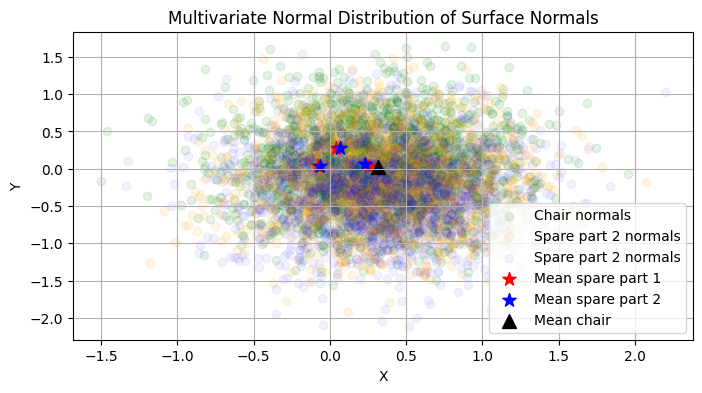

In [98]:
# Visualize the multivariate normal distribution
plt.figure(figsize=(8,4))
plt.scatter(samples_chair[:, 0], samples_chair[:, 1], alpha=0.1, c='green', label='Chair normals')
plt.scatter(samples_piece_1[:, 0], samples_piece_1[:, 1], c='orange', alpha=0.1, label='Spare part 2 normals')
plt.scatter(samples_piece_2[:, 0], samples_piece_2[:, 1], c='blue', alpha=0.05, label='Spare part 2 normals')

plt.scatter(cov_matrix_piece_1[0], cov_matrix_piece_1[1], c='red',  label='Mean spare part 1', marker='*', s=100)
plt.scatter(cov_matrix_piece_2[0], cov_matrix_piece_2[1], c='blue', label='Mean spare part 2', marker='*', s=100)
plt.scatter(mean_normal_chair[0],  mean_normal_chair[1],  c='black',   label='Mean chair',   marker='^', s=100, alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.title('Multivariate Normal Distribution of Surface Normals')
plt.show()

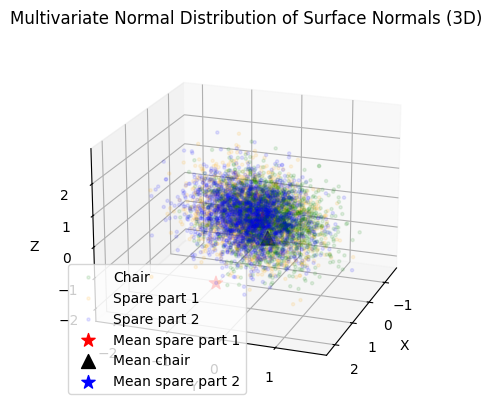

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples_chair[:, 0], samples_chair[:, 1], samples_chair[:, 2],       c='green', marker='.', label='Chair', alpha=0.1)
ax.scatter(samples_piece_1[:, 0], samples_piece_1[:, 1], samples_piece_1[:, 2], c='orange', marker='.', label='Spare part 1', alpha=0.1)
ax.scatter(samples_piece_2[:, 0], samples_piece_2[:, 1], samples_piece_2[:, 2], c='blue', marker='.', label='Spare part 2', alpha=0.1)

ax.scatter(samples_piece_1[0], samples_piece_1[1], samples_piece_1[2], c='red',   marker='*', s=100, label='Mean spare part 1')
ax.scatter(samples_chair[0],   samples_chair[1], samples_chair[2],     c='black', marker='^', s=100, label='Mean chair')
ax.scatter(samples_piece_2[0], samples_piece_2[1], samples_piece_2[2], c='blue',  marker='*', s=100, label='Mean spare part 2')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Multivariate Normal Distribution of Surface Normals (3D)')

ax.view_init(20, 20, 0)
plt.legend()
plt.show()

In [100]:
# Calculate the Bhattacharyya distance between the two distributions
def bhattacharyya_distance(normals_1, normals_2):
    """
    Calculates the Bhattacharyya distance between the normal distributions of two surfaces.

    Args:
        normals_1 (np.ndarray): An array of normal vectors for surface 1.
        normals_2 (np.ndarray): An array of normal vectors for surface 2.

    Returns:
        float: The Bhattacharyya distance between the two distributions.
    """
    mean1 = np.mean(normals_1, axis=0)
    cov1 = np.cov(normals_1, rowvar=False)

    mean2 = np.mean(normals_2, axis=0)
    cov2 = np.cov(normals_2, rowvar=False)

    cov_avg = 0.5 * (cov1 + cov2)
    mean_diff = mean1 - mean2
    
    term1 = 0.125 * mean_diff.T @ np.linalg.inv(cov_avg) @ mean_diff
    
    det_cov1 = np.linalg.det(cov1)
    det_cov2 = np.linalg.det(cov2)
    det_cov_avg = np.linalg.det(cov_avg)

    term2 = 0.5 * np.log(det_cov_avg / np.sqrt(det_cov1 * det_cov2))

    bhattacharyya_dist = term1 + term2

    return bhattacharyya_dist
                

bhattacharyya_distance_1 = bhattacharyya_distance(S_piece_1_normal, S_piece_2_normal)
bhattacharyya_distance_2 = bhattacharyya_distance(S_chair_normal, S_piece_1_normal)
bhattacharyya_distance_3 = bhattacharyya_distance(S_chair_normal, S_piece_2_normal)
bhattacharyya_distance_4 = bhattacharyya_distance(S_piece_2_normal, S_piece_1_normal)
bhattacharyya_distance_5 = bhattacharyya_distance(S_piece_2_normal, S_piece_2_normal)
bhattacharyya_distance_6 = bhattacharyya_distance(S_piece_2_normal, S_chair_normal)
print("Bhattacharyya Distance: chair vs piece 1", bhattacharyya_distance_2)
print("Bhattacharyya Distance: chair vs piece 2", bhattacharyya_distance_3)
print("Bhattacharyya Distance: piece1 vs piece 2", bhattacharyya_distance_1)
print("Bhattacharyya Distance: piece2 vs piece 1", bhattacharyya_distance_4)
print("Bhattacharyya Distance: piece2 vs chair ", bhattacharyya_distance_6)



Bhattacharyya Distance: chair vs piece 1 2.082171118146115
Bhattacharyya Distance: chair vs piece 2 1.9653577466453729
Bhattacharyya Distance: piece1 vs piece 2 0.16663038881651043
Bhattacharyya Distance: piece2 vs piece 1 0.16663038881651043
Bhattacharyya Distance: piece2 vs chair  1.9653577466453729


In [101]:
import numpy as np

def jensen_shannon_divergence(normals_1, normals_2):
    """
    Calculates the Jensen-Shannon Divergence between two normal distributions.

    Args:
        normals_1 (np.ndarray): An array of normal vectors for surface 1.
        normals_2 (np.ndarray): An array of normal vectors for surface 2.

    Returns:
        float: The Jensen-Shannon Divergence.
    """
    # Helper function for KL Divergence
    def kl_divergence_mvn(mean_p, cov_p, mean_q, cov_q):
        """Calculates the KL Divergence from distribution P to Q for MVNs."""
        k = len(mean_p)
        cov_q_inv = np.linalg.inv(cov_q)
        
        trace_term = np.trace(cov_q_inv @ cov_p)
        mean_diff = mean_q - mean_p
        mahalanobis_term = mean_diff.T @ cov_q_inv @ mean_diff
        log_term = np.log(np.linalg.det(cov_q) / np.linalg.det(cov_p))
        
        kl_div = 0.5 * (trace_term + mahalanobis_term - k + log_term)
        return kl_div

    # Estimate distribution parameters
    mean1 = np.mean(normals_1, axis=0)
    cov1 = np.cov(normals_1, rowvar=False)
    
    mean2 = np.mean(normals_2, axis=0)
    cov2 = np.cov(normals_2, rowvar=False)

    # Calculate the average distribution (mean is simple average, but covariance is not)
    # This is a common approximation for this type of problem.
    mean_avg = 0.5 * (mean1 + mean2)
    cov_avg = 0.5 * (cov1 + cov2)
    
    # Calculate KL divergence from each distribution to the average distribution
    kl1 = kl_divergence_mvn(mean1, cov1, mean_avg, cov_avg)
    kl2 = kl_divergence_mvn(mean2, cov2, mean_avg, cov_avg)
    
    # Jensen-Shannon Divergence is the average of the two KL divergences
    js_divergence = 0.5 * (kl1 + kl2)
    
    return js_divergence

jensen_shannon_distance_1 = jensen_shannon_divergence(S_piece_1_normal, S_piece_2_normal)
jensen_shannon_distance_2 = jensen_shannon_divergence(S_chair_normal, S_piece_1_normal)
jensen_shannon_distance_3 = jensen_shannon_divergence(S_chair_normal, S_piece_2_normal)
jensen_shannon_distance_4 = jensen_shannon_divergence(S_piece_2_normal, S_piece_1_normal)
jensen_shannon_distance_5 = jensen_shannon_divergence(S_piece_2_normal, S_piece_2_normal)
jensen_shannon_distance_6 = jensen_shannon_divergence(S_piece_2_normal, S_chair_normal)
print("Jensen Shannon divergence Distance: chair vs piece 1", jensen_shannon_distance_2)
print("Jensen Shannon divergence Distance: chair vs piece 2", jensen_shannon_distance_3)
print("Jensen Shannon divergence Distance: piece1 vs piece 2", jensen_shannon_distance_1)
print("Jensen Shannon divergence Distance: piece2 vs piece 1", jensen_shannon_distance_4)
print("Jensen Shannon divergence Distance: piece2 vs chair ", jensen_shannon_distance_6)

Jensen Shannon divergence Distance: chair vs piece 1 2.082171118146115
Jensen Shannon divergence Distance: chair vs piece 2 1.9653577466453727
Jensen Shannon divergence Distance: piece1 vs piece 2 0.16663038881651057
Jensen Shannon divergence Distance: piece2 vs piece 1 0.16663038881651057
Jensen Shannon divergence Distance: piece2 vs chair  1.9653577466453727


In [102]:
def hellinger_distance(normals_1, normals_2):
    """
    Calculates the Hellinger distance between the normal distributions of two surfaces.

    Args:
        normals_1 (np.ndarray): An array of normal vectors for surface 1.
        normals_2 (np.ndarray): An array of normal vectors for surface 2.

    Returns:
        float: The Hellinger distance.
    """
    mean1 = np.mean(normals_1, axis=0)
    cov1 = np.cov(normals_1, rowvar=False)

    mean2 = np.mean(normals_2, axis=0)
    cov2 = np.cov(normals_2, rowvar=False)

    cov_avg = 0.5 * (cov1 + cov2)
    mean_diff = mean1 - mean2
    
    term1 = 0.125 * mean_diff.T @ np.linalg.inv(cov_avg) @ mean_diff
    
    det_cov1 = np.linalg.det(cov1)
    det_cov2 = np.linalg.det(cov2)
    det_cov_avg = np.linalg.det(cov_avg)

    term2 = 0.5 * np.log(det_cov_avg / np.sqrt(det_cov1 * det_cov2))

    bhattacharyya_dist = term1 + term2
    
    # The Hellinger distance is derived from the Bhattacharyya coefficient
    # For Gaussian distributions, this is a known relationship
    hellinger_dist = np.sqrt(1 - np.exp(-bhattacharyya_dist))

    return hellinger_dist

hellinger_distance_1 = hellinger_distance(S_piece_1_normal, S_piece_2_normal)
hellinger_distance_2 = hellinger_distance(S_chair_normal, S_piece_1_normal)
hellinger_distance_3 = hellinger_distance(S_chair_normal, S_piece_2_normal)
hellinger_distance_4 = hellinger_distance(S_piece_2_normal, S_piece_1_normal)
hellinger_distance_5 = hellinger_distance(S_piece_2_normal, S_piece_2_normal)
hellinger_distance_6 = hellinger_distance(S_piece_2_normal, S_chair_normal)

print("hellinger_dist Distance: chair vs piece 1", hellinger_distance_2)
print("hellinger_dist Distance: chair vs piece 2", hellinger_distance_3)
print("hellinger_dist Distance: piece1 vs piece 2", hellinger_distance_1)
print("hellinger_dist Distance: piece2 vs piece 1", hellinger_distance_4)
print("hellinger_dist Distance: piece2 vs chair ", hellinger_distance_6)

hellinger_dist Distance: chair vs piece 1 0.9355964577850602
hellinger_dist Distance: chair vs piece 2 0.9273048283680823
hellinger_dist Distance: piece1 vs piece 2 0.3917748920173213
hellinger_dist Distance: piece2 vs piece 1 0.3917748920173213
hellinger_dist Distance: piece2 vs chair  0.9273048283680823


In [103]:
def mahalanobis_distance(normals_1, normals_2):
    """
    Calculates the Mahalanobis distance between the means of two normal distributions.
    
    Args:
        normals_1 (np.ndarray): An array of normal vectors for surface 1.
        normals_2 (np.ndarray): An array of normal vectors for surface 2.

    Returns:
        float: The Mahalanobis distance.
    """
    mean1 = np.mean(normals_1, axis=0)
    cov1 = np.cov(normals_1, rowvar=False)

    mean2 = np.mean(normals_2, axis=0)
    cov2 = np.cov(normals_2, rowvar=False)
    
    # Use the average covariance matrix for the distance
    cov_avg = 0.5 * (cov1 + cov2)
    cov_avg_inv = np.linalg.inv(cov_avg)
    
    mean_diff = mean1 - mean2
    
    # Mahalanobis distance squared
    mahalanobis_sq = mean_diff.T @ cov_avg_inv @ mean_diff
    
    return np.sqrt(mahalanobis_sq)

mahalanobis_distance_1 = mahalanobis_distance(S_piece_1_normal, S_piece_2_normal)
mahalanobis_distance_2 = mahalanobis_distance(S_chair_normal, S_piece_1_normal)
mahalanobis_distance_3 = mahalanobis_distance(S_chair_normal, S_piece_2_normal)
mahalanobis_distance_4 = mahalanobis_distance(S_piece_2_normal, S_piece_1_normal)
mahalanobis_distance_5 = mahalanobis_distance(S_piece_2_normal, S_piece_2_normal)
mahalanobis_distance_6 = mahalanobis_distance(S_piece_2_normal, S_chair_normal)

print("mahalanobis_distance Distance: chair vs piece 1", mahalanobis_distance_2)
print("mahalanobis_distance Distance: chair vs piece 2", mahalanobis_distance_3)
print("mahalanobis_distance Distance: piece1 vs piece 2", mahalanobis_distance_1)
print("mahalanobis_distance Distance: piece2 vs piece 1", mahalanobis_distance_4)
print("mahalanobis_distance Distance: piece2 vs chair ", mahalanobis_distance_6)

mahalanobis_distance Distance: chair vs piece 1 0.7584870393141369
mahalanobis_distance Distance: chair vs piece 2 0.7307340108121497
mahalanobis_distance Distance: piece1 vs piece 2 0.6956335678400054
mahalanobis_distance Distance: piece2 vs piece 1 0.6956335678400054
mahalanobis_distance Distance: piece2 vs chair  0.7307340108121497


In [106]:
from scipy.linalg import sqrtm

def wasserstein_distance_O2(normals_1, normals_2):
    """
    Calculates the 2-Wasserstein distance between two normal distributions.
    
    Args:
        normals_1 (np.ndarray): An array of normal vectors for surface 1.
        normals_2 (np.ndarray): An array of normal vectors for surface 2.

    Returns:
        float: The 2-Wasserstein distance.
    """
    mean1 = np.mean(normals_1, axis=0)
    cov1 = np.cov(normals_1, rowvar=False)

    mean2 = np.mean(normals_2, axis=0)
    cov2 = np.cov(normals_2, rowvar=False)
    
    mean_diff = mean1 - mean2
    
    # Calculate the mean component
    mean_term = np.sum(mean_diff**2)
    
    # Calculate the covariance component using a numerical method for sqrt of matrix
    cov_sqrt = sqrtm(cov1 @ cov2)
    cov_term = np.trace(cov1 + cov2 - 2 * cov_sqrt)
    
    return np.sqrt(mean_term + cov_term)

wasserstein_distance_1 = wasserstein_distance_O2(S_piece_1_normal, S_piece_2_normal)
wasserstein_distance_2 = wasserstein_distance_O2(S_chair_normal, S_piece_1_normal)
wasserstein_distance_3 = wasserstein_distance_O2(S_chair_normal, S_piece_2_normal)
wasserstein_distance_4 = wasserstein_distance_O2(S_piece_2_normal, S_piece_1_normal)
wasserstein_distance_5 = wasserstein_distance_O2(S_piece_2_normal, S_piece_2_normal)
wasserstein_distance_6 = wasserstein_distance_O2(S_piece_2_normal, S_chair_normal)
print("wasserstein_distance_2 Distance: chair vs piece 1", wasserstein_distance_2)
print("wasserstein_distance_2 Distance: chair vs piece 2", wasserstein_distance_3)
print("wasserstein_distance_2 Distance: piece1 vs piece 2", wasserstein_distance_1)
print("wasserstein_distance_2 Distance: piece2 vs piece 1", wasserstein_distance_4)
print("wasserstein_distance_2 Distance: piece2 vs chair ", wasserstein_distance_6)

wasserstein_distance_2 Distance: chair vs piece 1 285.0586752211921
wasserstein_distance_2 Distance: chair vs piece 2 287.6803486774982
wasserstein_distance_2 Distance: piece1 vs piece 2 26.978949326247335
wasserstein_distance_2 Distance: piece2 vs piece 1 26.978949326247346
wasserstein_distance_2 Distance: piece2 vs chair  287.68034867749816


In [114]:
table = PrettyTable()
table.field_names = ["Reference object", "Comparison object", "Shannon", "Bhattacharyya", "Hellinger", "Mahalanobis", "Wasserstein"]

In [115]:
valores = [
    ["chair",   "piece 1", bhattacharyya_distance_2, jensen_shannon_distance_2, hellinger_distance_2, mahalanobis_distance_2, wasserstein_distance_2],
    ["chair",   "piece 2", bhattacharyya_distance_3, jensen_shannon_distance_3, hellinger_distance_3, mahalanobis_distance_3, wasserstein_distance_3],
    ["piece 1", "piece 2", bhattacharyya_distance_1, jensen_shannon_distance_1, hellinger_distance_1, mahalanobis_distance_1, wasserstein_distance_1],
]

for row in valores:
    table.add_row(row)

table.float_format = ".3"
table.align = "r"

print(table)

+------------------+-------------------+---------+---------------+-----------+-------------+-------------+
| Reference object | Comparison object | Shannon | Bhattacharyya | Hellinger | Mahalanobis | Wasserstein |
+------------------+-------------------+---------+---------------+-----------+-------------+-------------+
|            chair |           piece 1 |   2.082 |         2.082 |     0.936 |       0.758 |     285.059 |
|            chair |           piece 2 |   1.965 |         1.965 |     0.927 |       0.731 |     287.680 |
|          piece 1 |           piece 2 |   0.167 |         0.167 |     0.392 |       0.696 |      26.979 |
+------------------+-------------------+---------+---------------+-----------+-------------+-------------+
